In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir)

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from common.preprocessing import CropDataProcessor

import pickle

# Load data

In [3]:
train_data = pd.read_csv("../data/Crop_Data__train.csv")

In [4]:
train_data.shape

(164986, 25)

# Preprocessing

In [5]:
data_preprocessor = CropDataProcessor(train_data, excluded_features=['Dew_Frost_Point', 'Year', 'State', 'District'])

In [6]:
data_preprocessor.get_training_data()[0].shape

Warning 1: Features are not processed yet.
Warning 2: Distribution of Yield may not be normal.


(164986, 19)

In [7]:
data_preprocessor.process_to_train()

Clustered Lat-Long to Geo Region.
Encoded Crop using WoE.
Transforming numerical features.
Transforming categorical features.


In [8]:
X, y = data_preprocessor.get_training_data()
X.shape, y.shape

((164986, 28), (164986,))

## Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RNN

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [89]:
model = Sequential()

model.add(Dense(units=14))
model.add(Dropout(rate=0.3))
model.add(Dense(units=7))


model.compile(optimizer='adam', loss='mse', metrics='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

model.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[es], batch_size=64)

Epoch 1/100
1444/1444 [==============================] - 2s 2ms/step - loss: 0.1474 - mse: 0.1474 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 2/100
1444/1444 [==============================] - 2s 2ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 3/100
1444/1444 [==============================] - 2s 2ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 4/100
1444/1444 [==============================] - 2s 2ms/step - loss: 0.0327 - mse: 0.0327 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 5/100
1444/1444 [==============================] - 3s 2ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 6/100
1444/1444 [==============================] - 3s 2ms/step - loss: 0.0311 - mse: 0.0311 - val_loss: 0.0279 - val_mse: 0.0279
Epoch 7/100
1444/1444 [==============================] - 3s 2ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 8/100
1444/1444 [==============================] 

<AxesSubplot:>

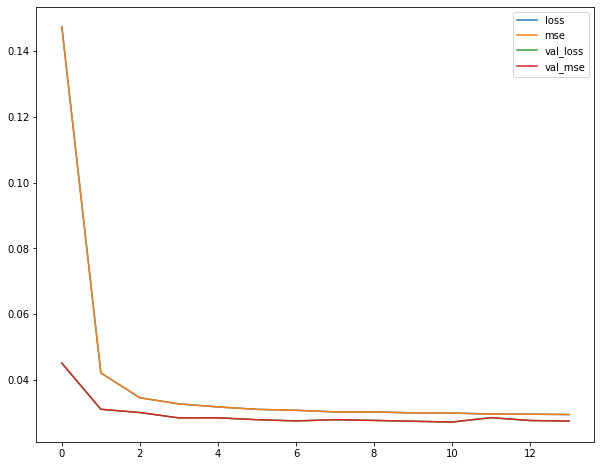

In [90]:
pd.DataFrame(model.history.history).plot(figsize=(10,8))

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(y_train, model.predict(X_train).mean(axis=1))

0.6702910321128328

In [93]:
r2_score(y_test, model.predict(X_test).mean(axis=1))

0.6650491976996057